# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
#pip install python-dotenv

In [2]:
#pip install newsapi-python

In [3]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yoheiwaki/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key='029418bb66a340f9896849b51f1297c8')

In [6]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="bitcoin", language="en")

print(f"Total articles about bitcoin: {bitcoin_news['totalResults']}")
bitcoin_news["articles"][0]

Total articles about bitcoin: 7150


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Paul Ford',
 'title': 'A Field Guide for Nature-Resistant Nerds',
 'description': 'Yes, yes, the dirt is horrifying. But it’s also how we make bitcoin apps.',
 'url': 'https://www.wired.com/story/a-field-guide-for-nature-resistant-nerds-microchips-climate-change/',
 'urlToImage': 'https://media.wired.com/photos/61086c497b8c62be3062fe82/191:100/w_1280,c_limit/WI090121_MG_Ford_01.jpg',
 'publishedAt': '2021-08-06T11:00:00Z',
 'content': 'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]'}

In [7]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="ethereum", language="en")

print(f"Total articles about ethereum: {ethereum_news['totalResults']}")
ethereum_news["articles"][0]

Total articles about ethereum: 2419


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Connie Loizos',
 'title': 'Crypto investors like Terraform Labs so much, they’re committing $150 million to its ‘ecosystem’',
 'description': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote about in May. Often, these technologies are seen as so prom…',
 'url': 'http://techcrunch.com/2021/07/16/crypto-investors-like-terraform-labs-so-much-theyre-committing-150-million-to-its-ecosystem/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/06/GettyImages-1174590894.jpg?w=667',
 'publishedAt': '2021-07-16T16:00:55Z',
 'content': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]'}

In [8]:
# Create the Bitcoin sentiment scores DataFrame

bitcoin_sentiments = []

# Get sentiment and append to list
for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        positive = sentiment["pos"]
        negative = sentiment["neg"]
        neutral = sentiment["neu"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": positive,
            "negative": negative,
            "neutral": neutral
        })
    
    except AttributError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,text,compound,positive,negative,neutral
0,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939
1,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
2,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873
3,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
4,"As longtime TechCrunch readers know well, Mich...",0.2732,0.097,0.000,0.903


In [9]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()


,text,compound,positive,negative,neutral
0,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925
1,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939
2,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
3,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810
4,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.000,1.000


In [10]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.048400,0.059400,0.046450,0.89415
std,0.463778,0.059611,0.083549,0.09326
min,-0.827100,0.000000,0.000000,0.65300
25%,-0.307000,0.000000,0.000000,0.85325
50%,0.000000,0.056000,0.000000,0.91050
75%,0.445000,0.092500,0.076250,0.95425
max,0.726400,0.178000,0.287000,1.00000


In [11]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.00000
mean,0.174515,0.056050,0.01345,0.93050
std,0.312339,0.073898,0.02766,0.08117
min,-0.340000,0.000000,0.00000,0.78200
25%,0.000000,0.000000,0.00000,0.84275
50%,0.000000,0.000000,0.00000,0.96950
75%,0.402575,0.129500,0.00000,1.00000
max,0.726400,0.190000,0.07200,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score of 0.059400 whereas Ethereum had 0.056050.

Q: Which coin had the highest compound score?

A: Both Bitcoin and Etherium had the highest compound score of 0.72640.

Q. Which coin had the highest positive score?

A: Etherium had the highest positive score of 0.190000 whereas Bitcoin had 0.178000.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))
print(sw)
# Expand the default stopwords list if necessary
sw_addons = {'with', 'been', 'the','while', 'through'}

{'him', 'himself', "wasn't", 'be', 'he', 'the', "didn't", "you'd", 'mightn', 'did', "should've", 'hers', 'their', 'with', "weren't", "wouldn't", 'them', 'under', 'yourself', 'have', 'down', 'his', 'whom', 'doing', "won't", "doesn't", 'while', "hadn't", 'who', 'theirs', 'of', 'so', 'had', 'doesn', "you'll", 'i', 'or', 'all', 'does', 'ourselves', 'by', 'now', 'myself', 'yourselves', 'we', 'same', 'me', 'being', "don't", 'ours', 'no', 'wouldn', 'been', 'haven', 'through', 'not', 'needn', 'shan', 'again', 'are', "that'll", "mustn't", "you've", 'before', "it's", "needn't", "couldn't", 'there', 'any', 'in', 'you', 'after', 'm', 'y', 'my', 'herself', 're', 'hadn', "you're", 'these', 'isn', 'nor', 'her', 'further', 'has', 'an', 'into', 'to', 'until', 'very', 'over', 'is', 'too', 'how', 'why', 'if', 'own', 'only', 'such', 'as', "shouldn't", 's', 'they', 'once', 'this', 't', 'didn', 'just', 'should', 'shouldn', 'won', 'on', 'mustn', "aren't", 'here', 'your', 'and', 'more', 'its', 'couldn', 'agai

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the stop words
    sw= set(stopwords.words('english'))
    
    # Remove the punctuation from text
    regex= re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str(text))
   
    # Create a tokenized list of the words
    words= word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem=[lemmatizer.lemmatize(word) for word in words]
       
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    return tokens


In [15]:
# Create a new tokens column for Bitcoin

bitcoin_word_tokenized = []

for text in bitcoin_df['text']:
    
    tokenized_text = tokenizer(text)
    
    bitcoin_word_tokenized.append(tokenized_text)
    
    
bitcoin_df["tokens"] = bitcoin_word_tokenized

bitcoin_df = bitcoin_df[["compound", "positive", "negative", "neutral", "text", "tokens"]] 

bitcoin_df.head()
                               

,compound,positive,negative,neutral,text,tokens
0,-0.3400,0.000,0.061,0.939,When my wife started a little garden in our ur...,"[wife, started, little, garden, urban, backyar..."
1,0.6908,0.178,0.000,0.822,"Like Dogecoin devotees, the mayor of Reno, and...","[like, dogecoin, devotee, mayor, reno, leader,..."
2,0.6240,0.127,0.000,0.873,To get a roundup of TechCrunchs biggest and mo...,"[get, roundup, techcrunchs, biggest, important..."
3,0.7264,0.164,0.000,0.836,While retail investors grew more comfortable b...,"[retail, investor, grew, comfortable, buying, ..."
4,0.2732,0.097,0.000,0.903,"As longtime TechCrunch readers know well, Mich...","[longtime, techcrunch, reader, know, well, mic..."


In [16]:
# Create a new tokens list of Bitcoin tokenized word

bitcoin_text = str(list(bitcoin_df['text']))

bitcoin_tokens = tokenizer(bitcoin_text)

In [17]:
# Create a new tokens column for Ethereum

eth_word_tokenized = []

for text in ethereum_df['text']:
    
    tokenized_text = tokenizer(text)
    
    eth_word_tokenized.append(tokenized_text)
    

ethereum_df["tokens"] = eth_word_tokenized

ethereum_df = ethereum_df[["compound", "positive", "negative", "neutral", "text", "tokens"]] 

ethereum_df.head()

,compound,positive,negative,neutral,text,tokens
0,0.3612,0.075,0.000,0.925,There are many blockchain platforms competing ...,"[many, blockchain, platform, competing, invest..."
1,-0.2411,0.000,0.061,0.939,Blockchain infrastructure startups are heating...,"[blockchain, infrastructure, startup, heating,..."
2,0.7264,0.164,0.000,0.836,While retail investors grew more comfortable b...,"[retail, investor, grew, comfortable, buying, ..."
3,0.6956,0.190,0.000,0.810,Cent was founded in 2017 as an ad-free creator...,"[cent, wa, founded, adfree, creator, network, ..."
4,0.0000,0.000,0.000,1.000,Representation of the Ethereum virtual currenc...,"[representation, ethereum, virtual, currency, ..."


In [18]:
# Create a new tokens list of ethereum tokenized word

ethereum_text = str(list(ethereum_df['text']))

ethereum_tokens = tokenizer(ethereum_text)

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
# Count bitcoin
bitcoin_word_count = Counter(bitcoin_tokens)
print(bitcoin_word_count)


Counter({'char': 19, 'bitcoin': 10, 'reuters': 7, 'reutersdado': 6, 'july': 5, 'illustration': 5, 'taken': 5, 'attack': 5, 'seen': 4, 'get': 3, 'cryptocurrencies': 3, 'ethereum': 3, 'world': 3, 'wa': 3, 'virtual': 3, 'currency': 3, 'front': 3, 'business': 3, 'company': 3, 'worm': 2, 'bug': 2, 'like': 2, 'cryptocurrency': 2, 'maker': 2, 'ha': 2, 'techcrunch': 2, 'well': 2, 'tuesday': 2, 'representation': 2, 'stock': 2, 'graph': 2, 'november': 2, 'opening': 2, 'sign': 2, 'first': 2, 'launched': 2, 'ago': 2, 'month': 2, 'representations': 2, 'tesla': 2, 'inc': 2, 'ransomware': 2, 'become': 2, 'circle': 2, 'posted': 2, 'wife': 1, 'started': 1, 'little': 1, 'garden': 1, 'urban': 1, 'backyard': 1, 'could': 1, 'think': 1, 'also': 1, 'dirt': 1, 'course': 1, 'filled': 1, 'composted': 1, 'corn': 1, 'cob': 1, 'dogecoin': 1, 'devotee': 1, 'mayor': 1, 'reno': 1, 'leader': 1, 'el': 1, 'salvador': 1, 'aldo': 1, 'baoicchi': 1, 'convinced': 1, 'future': 1, 'ceo': 1, 'founder': 1, 'canadian': 1, 'scoote

In [21]:
# Generate the Bitcoin N-grams where N=2
bitcoin_ngrams_count = Counter(ngrams(bitcoin_tokens,n=2))
print(dict(bitcoin_ngrams_count))

{('wife', 'started'): 1, ('started', 'little'): 1, ('little', 'garden'): 1, ('garden', 'urban'): 1, ('urban', 'backyard'): 1, ('backyard', 'could'): 1, ('could', 'think'): 1, ('think', 'worm'): 1, ('worm', 'also'): 1, ('also', 'bug'): 1, ('bug', 'dirt'): 1, ('dirt', 'course'): 1, ('course', 'filled'): 1, ('filled', 'worm'): 1, ('worm', 'bug'): 1, ('bug', 'composted'): 1, ('composted', 'corn'): 1, ('corn', 'cob'): 1, ('cob', 'char'): 1, ('char', 'like'): 1, ('like', 'dogecoin'): 1, ('dogecoin', 'devotee'): 1, ('devotee', 'mayor'): 1, ('mayor', 'reno'): 1, ('reno', 'leader'): 1, ('leader', 'el'): 1, ('el', 'salvador'): 1, ('salvador', 'aldo'): 1, ('aldo', 'baoicchi'): 1, ('baoicchi', 'convinced'): 1, ('convinced', 'cryptocurrency'): 1, ('cryptocurrency', 'future'): 1, ('future', 'ceo'): 1, ('ceo', 'founder'): 1, ('founder', 'canadian'): 1, ('canadian', 'scooter'): 1, ('scooter', 'maker'): 1, ('maker', 'daymak'): 1, ('daymak', 'belief'): 1, ('belief', 'char'): 1, ('char', 'get'): 1, ('get

In [22]:
# Count etereum
ethereum_word_count = Counter(ethereum_tokens)
print(dict(ethereum_word_count))

{'many': 1, 'blockchain': 4, 'platform': 4, 'competing': 1, 'investor': 2, 'developer': 2, 'attention': 1, 'right': 1, 'big': 1, 'daddy': 1, 'ethereum': 15, 'socalled': 1, 'killers': 1, 'like': 4, 'solana': 1, 'wrote': 1, 'char': 20, 'infrastructure': 1, 'startup': 1, 'heating': 1, 'industry': 1, 'fervor': 1, 'brings': 1, 'user': 2, 'space': 1, 'still': 2, 'feel': 1, 'extremely': 1, 'young': 1, 'despite': 1, 'heavy': 1, 'institutional': 1, 'embrace': 1, 'crypto': 2, 'retail': 1, 'grew': 1, 'comfortable': 1, 'buying': 1, 'cryptocurrencies': 5, 'bitcoin': 4, 'decentralized': 2, 'application': 1, 'world': 3, 'ha': 4, 'lot': 1, 'work': 1, 'come': 1, 'onboarding': 1, 'cent': 1, 'wa': 3, 'founded': 1, 'adfree': 1, 'creator': 1, 'network': 3, 'allows': 1, 'offer': 1, 'reward': 1, 'good': 1, 'post': 1, 'comment': 1, 'gifting': 1, 'award': 1, 'reddit': 1, 'representation': 3, 'virtual': 3, 'currency': 3, 'standing': 1, 'pc': 4, 'motherboard': 4, 'seen': 3, 'illustration': 6, 'picture': 2, 'febr

In [23]:
# Generate the Ethereum N-grams where N=2
ethereum_ngrams_count = Counter(ngrams(ethereum_tokens,n=2))
print(dict(ethereum_ngrams_count))

{('many', 'blockchain'): 1, ('blockchain', 'platform'): 1, ('platform', 'competing'): 1, ('competing', 'investor'): 1, ('investor', 'developer'): 1, ('developer', 'attention'): 1, ('attention', 'right'): 1, ('right', 'big'): 1, ('big', 'daddy'): 1, ('daddy', 'ethereum'): 1, ('ethereum', 'socalled'): 1, ('socalled', 'ethereum'): 1, ('ethereum', 'killers'): 1, ('killers', 'like'): 1, ('like', 'solana'): 1, ('solana', 'wrote'): 1, ('wrote', 'char'): 1, ('char', 'blockchain'): 1, ('blockchain', 'infrastructure'): 1, ('infrastructure', 'startup'): 1, ('startup', 'heating'): 1, ('heating', 'industry'): 1, ('industry', 'fervor'): 1, ('fervor', 'brings'): 1, ('brings', 'developer'): 1, ('developer', 'user'): 1, ('user', 'space'): 1, ('space', 'still'): 1, ('still', 'feel'): 1, ('feel', 'extremely'): 1, ('extremely', 'young'): 1, ('young', 'despite'): 1, ('despite', 'heavy'): 1, ('heavy', 'institutional'): 1, ('institutional', 'embrace'): 1, ('embrace', 'crypto'): 1, ('crypto', 'char'): 1, ('ch

In [24]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)


In [25]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_top10_token_count = token_count(bitcoin_tokens)
print(bitcoin_top10_token_count)

[('char', 19), ('bitcoin', 10), ('reuters', 7), ('reutersdado', 6), ('july', 5), ('illustration', 5), ('taken', 5), ('attack', 5), ('seen', 4), ('get', 3)]


In [26]:
# Use token_count to get the top 10 words for Ethereum
ethereum_top10_token_count = token_count(ethereum_tokens)
print(ethereum_top10_token_count)

[('char', 20), ('ethereum', 15), ('illustration', 6), ('reuters', 6), ('cryptocurrencies', 5), ('reutersdado', 5), ('taken', 5), ('blockchain', 4), ('platform', 4), ('like', 4)]


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [27]:
# pip install wordcloud

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [29]:
# Convert a list of tokens into a single string of tokens
bitcoin_token_string = ' '.join(bitcoin_tokens)
print(bitcoin_token_string)

wife started little garden urban backyard could think worm also bug dirt course filled worm bug composted corn cob char like dogecoin devotee mayor reno leader el salvador aldo baoicchi convinced cryptocurrency future ceo founder canadian scooter maker daymak belief char get roundup techcrunchs biggest important story delivered inbox every day pm pdt subscribe herernhello welcome daily crunch july char retail investor grew comfortable buying cryptocurrencies like bitcoin ethereum decentralized application world still ha lot work come onboarding char longtime techcrunch reader know well michael arrington cofounded techcrunch crunchbase well venture fund crunchfund wa later renamed tuesday capital arringto char singapore july reuters bitcoin broke wednesday headed another attempt breaking monthslong range short seller bailed trader drew confidence fr char james martincnetrna uk man wa arrested spain alleged role massive hack highprofile twitter account targeted politiciansxaand celebrity

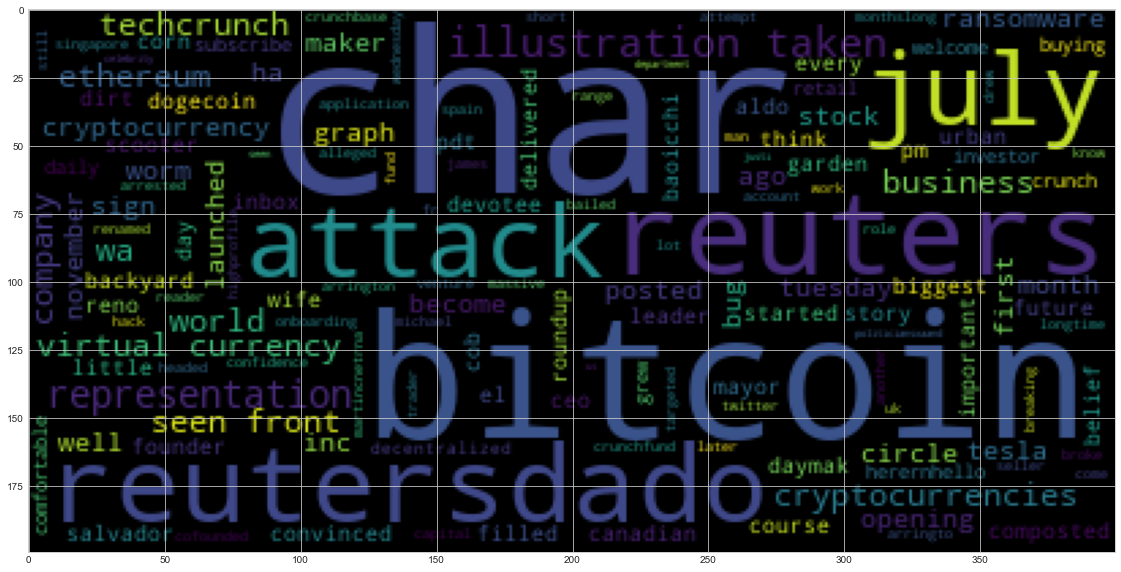

In [30]:
# Generate the Bitcoin word cloud
bitcoin_wc = WordCloud().generate(bitcoin_token_string)

plt.imshow(bitcoin_wc)

In [31]:
ethereum_token_string = ' '.join(ethereum_tokens)
print(ethereum_token_string)


many blockchain platform competing investor developer attention right big daddy ethereum socalled ethereum killers like solana wrote char blockchain infrastructure startup heating industry fervor brings developer user space still feel extremely young despite heavy institutional embrace crypto char retail investor grew comfortable buying cryptocurrencies like bitcoin ethereum decentralized application world still ha lot work come onboarding char cent wa founded adfree creator network allows user offer crypto reward good post comment like gifting award reddit ethereum char representation ethereum virtual currency standing pc motherboard seen illustration picture february reutersdado ruvicillustrationnew york aug reuters maj char hong kong aug reuters ether held near twomonth high thursday ahead major adjustment underlying ethereum blockchain would alter way transaction processedrnthe char representations cryptocurrencies bitcoin ethereum placed pc motherboard illustration taken june reut

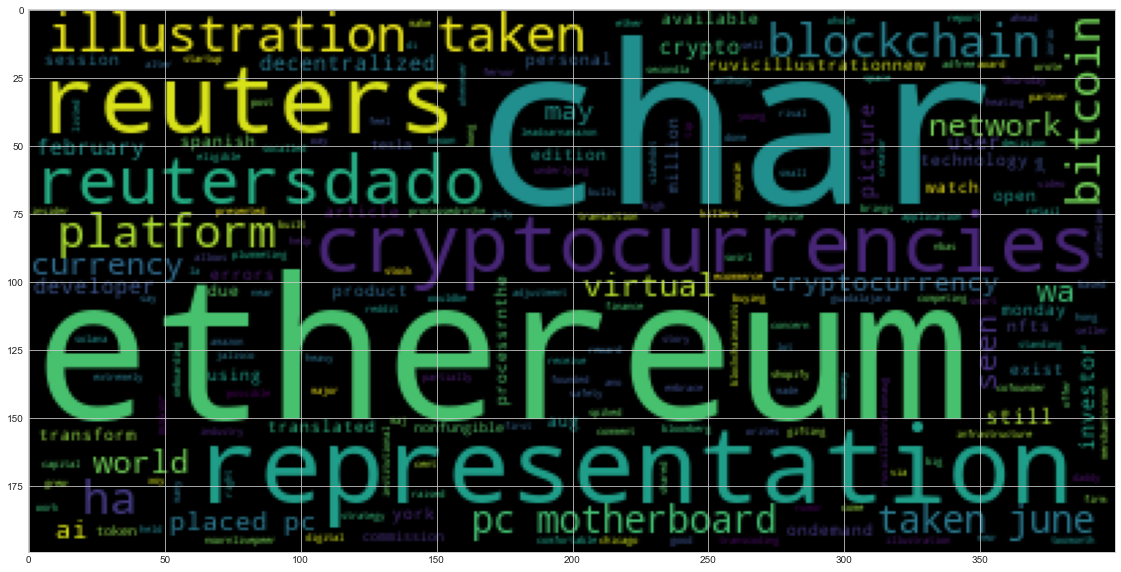

In [32]:
# Generate the Ethereum word cloud
ethereum_wc = WordCloud().generate(ethereum_token_string)

plt.imshow(ethereum_wc)


---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [33]:
import spacy
from spacy import displacy

In [34]:
# Download the language model for SpaCy
# python -m spacy download en_core_web_sm

In [ ]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [ ]:
# Concatenate all of the Bitcoin text together
bitcoin_text

In [ ]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [ ]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [ ]:
# List all Entities

bitcoin_doc.ents

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
ethereum_text

In [ ]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_text)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"

In [ ]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [ ]:
# List all Entities

ethereum_doc.ents

---